In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 199 kB 68.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=01b65cd6b6d4a51b1c5f16dabe209207bbc1e90b7cd3dd7beb94c42981569c8e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
import requests
import json
import time
import pyspark
import pandas as pd


In [3]:
from pyspark import SparkContext
sc = pyspark.SparkContext(appName="Op")

In [4]:
## convert champions ids to name
link='http://ddragon.leagueoflegends.com/cdn/12.23.1/data/en_US/champion.json'
response = requests.get(link)
data = json.loads(response.content)
with open('champion_ids_names', 'w') as f:
          json.dump(data, f)
def map_champ(y,id_to_name=True):
  # Y is an rdd with format (champion id ,some value)
  # return rdd with format (champion name ,some value)
  # id_to_name=True map from id to name else map from name to class
  champ_id_name = sc.textFile('/content/champion_ids_names').map(lambda x: json.loads(x))
  keys=champ_id_name.map(lambda x: x["data"]).flatMap(lambda x:x.items()).map(lambda x:(int(x[1]["key"]),x[0]))
  classes=champ_id_name.map(lambda x: x["data"]).flatMap(lambda x:x.items()).map(lambda x:(x[0],x[1]["tags"]))
  if id_to_name:
   
    id_name=y.fullOuterJoin(keys).filter(lambda x:x[1][0]!=None).filter(lambda x:x[1][1]!=None)
    print(id_name.collect())
    id_name=id_name.map(lambda x: (x[1][1],x[1][0]))
    return id_name

  else:
    name_class=y.fullOuterJoin(classes).filter(lambda x:x[1][0]!=None).filter(lambda x:x[1][1]!=None)
    name_class=name_class.map(lambda x: (x[1][1],x[1][0]))
    return name_class

  










In [5]:
champ_id_name = sc.textFile('/content/champion_ids_names').map(lambda x: json.loads(x))
keys=champ_id_name.map(lambda x: x["data"]).flatMap(lambda x:x.items()).map(lambda x:(int(x[1]["key"]),x[0]))
c=champ_id_name.map(lambda x: x["data"]).flatMap(lambda x:x.items()).map(lambda x:(x[0],x[1]["tags"]))


In [6]:
c.collect()[0]

('Aatrox', ['Fighter', 'Tank'])

In [7]:
url_item='http://ddragon.leagueoflegends.com/cdn/12.23.1/data/en_US/item.json'
response = requests.get(url_item)
items = json.loads(response.content)
with open('champion_items_names', 'w') as f:
          json.dump(items, f)
item_dict = {}
for id in items["data"]:
    item_dict[id] = items["data"][id]["name"]
     

In [8]:
item_dict

{'1001': 'Boots',
 '1004': 'Faerie Charm',
 '1006': 'Rejuvenation Bead',
 '1011': "Giant's Belt",
 '1018': 'Cloak of Agility',
 '1026': 'Blasting Wand',
 '1027': 'Sapphire Crystal',
 '1028': 'Ruby Crystal',
 '1029': 'Cloth Armor',
 '1031': 'Chain Vest',
 '1033': 'Null-Magic Mantle',
 '1035': 'Emberknife',
 '1036': 'Long Sword',
 '1037': 'Pickaxe',
 '1038': 'B. F. Sword',
 '1039': 'Hailblade',
 '1040': 'Obsidian Edge',
 '1042': 'Dagger',
 '1043': 'Recurve Bow',
 '1052': 'Amplifying Tome',
 '1053': 'Vampiric Scepter',
 '1054': "Doran's Shield",
 '1055': "Doran's Blade",
 '1056': "Doran's Ring",
 '1057': 'Negatron Cloak',
 '1058': 'Needlessly Large Rod',
 '1082': 'Dark Seal',
 '1083': 'Cull',
 '1101': 'Scorchclaw Pup',
 '1102': 'Gustwalker Hatchling',
 '1103': 'Mosstomper Seedling',
 '1104': 'Eye of the Herald',
 '1500': 'Penetrating Bullets',
 '1501': 'Fortification',
 '1502': 'Reinforced Armor',
 '1503': "Warden's Eye",
 '1504': 'Vanguard',
 '1505': 'Lightning Rod',
 '1506': 'Reinforced

In [9]:
def map_item_id_name(x,item_dict=item_dict):
  ##Takes an RDD of format (item_id,somthing) and maps (item_name,something)
  x=x.collect()
  print(x)
 
  y=[]
  for id in x:
     print(id[0])
     name=item_dict[str(id[0])]
     y_name=(name,id[1])
     y.append(y_name)

  return y


In [11]:
!cp '/content/drive/MyDrive/Bigdata_minproject2_deliver/matches.txt' '/content/'  

In [13]:
with open("/content/matches.txt", "r") as f:
   with open('All_matchesjson', 'w') as f2:
     lines=f.readlines()
     json.dump(lines,f2)
   

In [14]:
rddfile = sc.textFile('/content/matches.txt').map(lambda x: json.loads(x))

In [15]:
rddfile.collect()[0]

{'metadata': {'dataVersion': '2',
  'matchId': 'EUW1_6198306008',
  'participants': ['SSOhfA50tth-4TdKZQq7lf5IH6W750cmH_3C43NGuobwjdSTaqliiL4iFPPdjrjtDbmF8ER7toQRgg',
   'C33Tiqgb15f8E4yQvM88uSbEdrVGRSHpbrjNaT5Dwhm4TdffVWAyRb6wz2tjj3CRYPsuPQTTx8nXvQ',
   'N7DatLdvz31zbZAjs1OyQiE31doH0mBTffpCQeheZ7LHXHgrvJ4P-nEfYM7eN3zLt2nEW1-dtou3Bw',
   'syXNNuo_rxqVNXSjuEeFawUw6B4Xyv9RuzeyQlYY4qTVB2p9MS55idOK2RY6XrNQ4erAeONySthfqw',
   'TWdFSUGR9sjPol2UyasALaQ56IrteGuzppH2IbyFfxly-GqTXLGZt3b0VDKQMAKNR0VF6igkhcsn0g',
   '3ITzAZ2wSKyyMSVF4_gPlVaCRNrDxa3wEQupnYA9llh26pLV2RQp8AAzm3i5Ikl5DcsrommJbf1-Nw',
   '953Z3xyRbZONqxHGYf0CdLAAAj0V2v167ZHIPgEJaTtgpLX91zpD0JBDuPjx-7Cns9sq54t7j4esQg',
   'IRT28a4bmYFs_3k-aXsTj4-GPVLgiWNZuv89_tgVPwq9vM1nV4qLZqvgVdIOZ9OrZckIjFG2DVEbyw',
   '1e81GAKoCa9Fa2a8IsQE8-jT9ctsEpIY19o00g5GRC38cAKicoFGeIUHY8XwkeiLAklbNt0gepBOyA',
   '55pUmuw4b9ccCn4NSxn6-angPDwVgucxznWlW-p69rRYVX4BAb-z8V5gaoNAikNjek5TJX55ha7K0g']},
 'info': {'gameCreation': 1671618652894,
  'gameDuration': 1675,
 

In [16]:
participant=rddfile.map(lambda x: x["info"]).flatMap(lambda x:x["participants"])

In [17]:
participant.collect()[0]

{'allInPings': 2,
 'assistMePings': 9,
 'assists': 5,
 'baitPings': 0,
 'baronKills': 0,
 'basicPings': 0,
 'bountyLevel': 0,
 'challenges': {'12AssistStreakCount': 0,
  'abilityUses': 289,
  'acesBefore15Minutes': 0,
  'alliedJungleMonsterKills': 0,
  'baronTakedowns': 0,
  'blastConeOppositeOpponentCount': 0,
  'bountyGold': 0,
  'buffsStolen': 0,
  'completeSupportQuestInTime': 0,
  'controlWardTimeCoverageInRiverOrEnemyHalf': 0.03208098139899362,
  'controlWardsPlaced': 1,
  'damagePerMinute': 878.571279647695,
  'damageTakenOnTeamPercentage': 0.27126129294526763,
  'dancedWithRiftHerald': 0,
  'deathsByEnemyChamps': 7,
  'dodgeSkillShotsSmallWindow': 1,
  'doubleAces': 0,
  'dragonTakedowns': 1,
  'earliestDragonTakedown': 1164.997154195395,
  'earlyLaningPhaseGoldExpAdvantage': 0,
  'effectiveHealAndShielding': 0,
  'elderDragonKillsWithOpposingSoul': 0,
  'elderDragonMultikills': 0,
  'enemyChampionImmobilizations': 2,
  'enemyJungleMonsterKills': 0,
  'epicMonsterKillsNearEnemy

In [18]:
### Winning participants 
Win_patricipants=participant.filter(lambda x:x["win"]==True)

In [19]:
Champ_win=Win_patricipants.map(lambda x: (x["championName"],x["win"]))

In [20]:
from operator import add
Champs_wins=Champ_win.reduceByKey(add)


In [21]:
### Champions picks
Champ_picks=participant.map(lambda x: (x["championName"],1))
Champ_picks=Champ_picks.reduceByKey(add)

In [22]:
champ_win_pick=Champs_wins.fullOuterJoin(Champ_picks)   #format (champ,win,picks)

In [23]:
champ_win_pick.collect()

[('Syndra', (293, 590)),
 ('Lulu', (314, 603)),
 ('LeeSin', (310, 672)),
 ('TwistedFate', (116, 255)),
 ('Kayn', (336, 677)),
 ('Jayce', (137, 271)),
 ('Rell', (58, 119)),
 ('MissFortune', (512, 1016)),
 ('Mordekaiser', (446, 852)),
 ('Evelynn', (168, 323)),
 ('Riven', (209, 418)),
 ('Volibear', (179, 388)),
 ('Tryndamere', (163, 335)),
 ('Kled', (93, 145)),
 ('Camille', (191, 393)),
 ('Gnar', (110, 222)),
 ('Yuumi', (282, 604)),
 ('FiddleSticks', (199, 396)),
 ('Akshan', (162, 306)),
 ('Qiyana', (168, 327)),
 ('Pantheon', (218, 453)),
 ('Vladimir', (224, 420)),
 ('Singed', (142, 290)),
 ('Gragas', (195, 388)),
 ('Nocturne', (172, 339)),
 ('Lillia', (239, 456)),
 ('Rakan', (131, 276)),
 ('Shen', (234, 435)),
 ('Pyke', (405, 791)),
 ('Yasuo', (532, 1049)),
 ('Leona', (241, 433)),
 ('Corki', (93, 187)),
 ('Poppy', (94, 191)),
 ('Zyra', (176, 326)),
 ('Garen', (308, 618)),
 ('Jax', (275, 553)),
 ('Gangplank', (359, 749)),
 ('Irelia', (310, 613)),
 ('Lux', (581, 1186)),
 ('Talon', (149, 29

In [24]:
###champ win rate 
champ_win_pick=Champs_wins.fullOuterJoin(Champ_picks)   #format (champ,win,picks)
champ_win_rate=champ_win_pick.map(lambda x:(x[0],((x[1][0]/x[1][1]))*100))
champ_win_rate.sortBy(lambda x : x[1],ascending = False).collect()

[('Kled', 64.13793103448275),
 ('Sona', 57.89473684210527),
 ('Elise', 57.08502024291497),
 ('Leona', 55.65819861431871),
 ('MasterYi', 55.21367521367522),
 ('Fizz', 54.87804878048781),
 ('Renata', 54.83870967741935),
 ('Zac', 54.623655913978496),
 ('Katarina', 54.557291666666664),
 ('Jhin', 54.054054054054056),
 ('Zyra', 53.987730061349694),
 ('KogMaw', 53.84615384615385),
 ('Shen', 53.79310344827586),
 ('Nami', 53.66146458583433),
 ('Ivern', 53.57142857142857),
 ('DrMundo', 53.43283582089552),
 ('Vladimir', 53.333333333333336),
 ('Karthus', 53.19767441860465),
 ('Belveth', 53.141361256544506),
 ('Annie', 53.08056872037915),
 ('Akshan', 52.94117647058824),
 ('Taliyah', 52.94117647058824),
 ('Gwen', 52.916666666666664),
 ('Darius', 52.88184438040345),
 ('Sivir', 52.88065843621399),
 ('Ornn', 52.69607843137255),
 ('Braum', 52.659574468085104),
 ('Lillia', 52.41228070175439),
 ('Maokai', 52.41228070175439),
 ('Quinn', 52.38095238095239),
 ('Lucian', 52.35668789808917),
 ('Seraphine', 52.

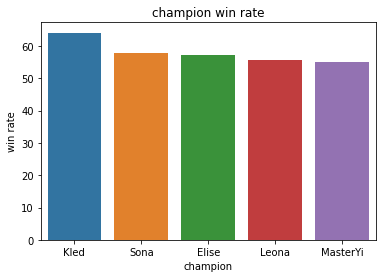

In [25]:
## champ win rate 

# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame(champ_win_rate.sortBy(lambda x : x[1],ascending = False).collect()[0:5])
df.rename(columns = {1:'win rate',0:"champion"}, inplace = True)
sns.barplot(x ='champion', y ='win rate', data = df)
# Show the plot
plt.title("champion win rate")
plt.show()



In [26]:
## pick rate each champ picks num/total num of champions

total_num_picks=Champ_picks.map(lambda x:("count",x[1]))
total_num_picks=total_num_picks.reduceByKey(add).collect()[0][1] ## Total num of picks
Champ_picks_rate=Champ_picks.map(lambda x: (x[0],((x[1]/total_num_picks)*100)))
Champ_picks_rate.sortBy(lambda x : x[1],ascending = False).collect()

[('Caitlyn', 1.7077847373130512),
 ('Ezreal', 1.6847756615109293),
 ('Kaisa', 1.647705483829733),
 ('Lux', 1.516042438962035),
 ('Jhin', 1.5134858749840214),
 ('Yasuo', 1.3409178064681069),
 ('Twitch', 1.3166304486769782),
 ('Ashe', 1.3076824747539306),
 ('MissFortune', 1.2987345008308833),
 ('Zed', 1.2360986833695513),
 ('Sylas', 1.1568452000511313),
 ('Mordekaiser', 1.0890962546337721),
 ('Yone', 1.0724785887766841),
 ('Nami', 1.0648088968426435),
 ('Akali', 1.0494695129745621),
 ('Pyke', 1.0111210533043589),
 ('Lucian', 1.0034513613703182),
 ('Katarina', 0.9817205675572032),
 ('Thresh', 0.9714943116451489),
 ('Vayne', 0.9663811836891217),
 ('Diana', 0.965102901700115),
 ('Gangplank', 0.9574332097660744),
 ('Tristana', 0.953598363799054),
 ('Samira', 0.9267544420299118),
 ('Varus', 0.9178064681068644),
 ('Jinx', 0.9075802121948102),
 ('Ekko', 0.9011888022497763),
 ('Darius', 0.8871277003707018),
 ('Sett', 0.885849418381695),
 ('Morgana', 0.8845711363926883),
 ('Senna', 0.882014572414

In [27]:
total_num_picks

78230

In [28]:
##champion pick rate (champion,pickrate)
Champ_picks_rate.sortBy(lambda x : x[1],ascending = False).collect()

[('Caitlyn', 1.7077847373130512),
 ('Ezreal', 1.6847756615109293),
 ('Kaisa', 1.647705483829733),
 ('Lux', 1.516042438962035),
 ('Jhin', 1.5134858749840214),
 ('Yasuo', 1.3409178064681069),
 ('Twitch', 1.3166304486769782),
 ('Ashe', 1.3076824747539306),
 ('MissFortune', 1.2987345008308833),
 ('Zed', 1.2360986833695513),
 ('Sylas', 1.1568452000511313),
 ('Mordekaiser', 1.0890962546337721),
 ('Yone', 1.0724785887766841),
 ('Nami', 1.0648088968426435),
 ('Akali', 1.0494695129745621),
 ('Pyke', 1.0111210533043589),
 ('Lucian', 1.0034513613703182),
 ('Katarina', 0.9817205675572032),
 ('Thresh', 0.9714943116451489),
 ('Vayne', 0.9663811836891217),
 ('Diana', 0.965102901700115),
 ('Gangplank', 0.9574332097660744),
 ('Tristana', 0.953598363799054),
 ('Samira', 0.9267544420299118),
 ('Varus', 0.9178064681068644),
 ('Jinx', 0.9075802121948102),
 ('Ekko', 0.9011888022497763),
 ('Darius', 0.8871277003707018),
 ('Sett', 0.885849418381695),
 ('Morgana', 0.8845711363926883),
 ('Senna', 0.882014572414

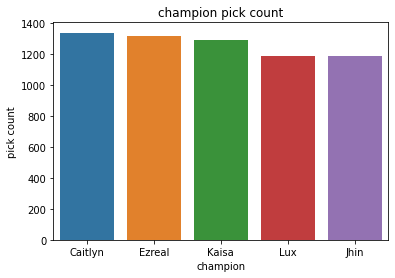

In [29]:
##champ pick count
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame(Champ_picks.sortBy(lambda x : x[1],ascending = False).collect()[0:5])
df.rename(columns = {1:'pick count',0:"champion"}, inplace = True)
sns.barplot(x ='champion', y ='pick count', data = df)
# Show the plot
plt.title("champion pick count")
plt.show()

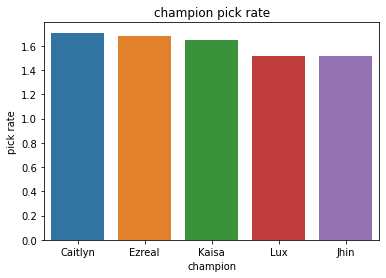

In [30]:
##champ pick count
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame(Champ_picks_rate.sortBy(lambda x : x[1],ascending = False).collect()[0:5])
df.rename(columns = {1:'pick rate',0:"champion"}, inplace = True)
sns.barplot(x ='champion', y ='pick rate', data = df)
# Show the plot
plt.title("champion pick rate")
plt.show()

#Champion bans#

In [31]:
bans=rddfile.map(lambda x: x["info"]).flatMap(lambda x: x["teams"]).flatMap(lambda x: x["bans"])
champ_bans=bans.map(lambda x: (x["championId"],1))
champ_bans=champ_bans.reduceByKey(add)

In [32]:
games=rddfile.map(lambda x: x["info"]).map(lambda x:x["gameId"])
total_games=len(games.collect())

In [33]:
##champ bans rate=ban/total_numofgames
champ_bans_rate=champ_bans.map(lambda x: (x[0],x[1]/total_games*100)).filter(lambda x:x[0]>0)
champ_bans_rate=map_champ(champ_bans_rate)
#champ_bans_rate.collect()

[(432, (0.4467134652201659, 'Bard')), (18, (2.9610721123165282, 'Tristana')), (36, (10.925335035098914, 'DrMundo')), (54, (1.4167198468410975, 'Malphite')), (72, (0.07657945118059988, 'Skarner')), (360, (14.588385449904276, 'Samira')), (234, (4.977664326738992, 'Viego')), (90, (4.454371410338226, 'Malzahar')), (126, (0.1914486279514997, 'Jayce')), (145, (3.85449904275686, 'Kaisa')), (1, (0.3828972559029994, 'Annie')), (163, (0.612635609444799, 'Taliyah')), (19, (3.0376515634971284, 'Warwick')), (37, (0.12763241863433314, 'Sona')), (55, (7.389917038927887, 'Katarina')), (91, (0.3828972559029994, 'Talon')), (235, (4.097000638162093, 'Senna')), (523, (0.5871091257179323, 'Aphelios')), (127, (0.5488194001276324, 'Lissandra')), (2, (2.5143586470963624, 'Olaf')), (164, (2.11869814932993, 'Camille')), (20, (0.7147415443522656, 'Nunu')), (38, (8.640714741544352, 'Kassadin')), (200, (19.0044671346522, 'Belveth')), (56, (2.4760689215060623, 'Nocturne')), (74, (2.6419910657306955, 'Heimerdinger')

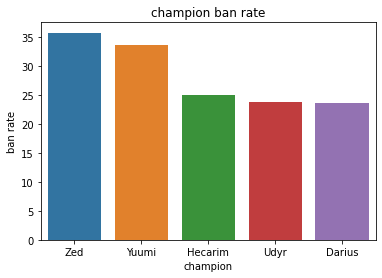

In [34]:
##champ ban rates
df=pd.DataFrame(champ_bans_rate.sortBy(lambda x : x[1],ascending = False).collect()[0:5])
df.rename(columns = {1:'ban rate',0:"champion"}, inplace = True)
sns.barplot(x ='champion', y ='ban rate', data = df)
# Show the plot
plt.title("champion ban rate")
plt.show()

#champions Synergy#

In [35]:
part_list=rddfile.map(lambda x: (x['info'],x["metadata"],1)).map(lambda x :(x[1]["matchId"],x[0]["participants"]))
all_list=rddfile.map(lambda x: (x["info"],x["metadata"],1)).map(lambda x :(x[1]["matchId"],x[0]["participants"]))

In [36]:
part_list2=part_list.flatMapValues(lambda x:x)

In [37]:
part_list2.collect()[0]

('EUW1_6198306008',
 {'allInPings': 2,
  'assistMePings': 9,
  'assists': 5,
  'baitPings': 0,
  'baronKills': 0,
  'basicPings': 0,
  'bountyLevel': 0,
  'challenges': {'12AssistStreakCount': 0,
   'abilityUses': 289,
   'acesBefore15Minutes': 0,
   'alliedJungleMonsterKills': 0,
   'baronTakedowns': 0,
   'blastConeOppositeOpponentCount': 0,
   'bountyGold': 0,
   'buffsStolen': 0,
   'completeSupportQuestInTime': 0,
   'controlWardTimeCoverageInRiverOrEnemyHalf': 0.03208098139899362,
   'controlWardsPlaced': 1,
   'damagePerMinute': 878.571279647695,
   'damageTakenOnTeamPercentage': 0.27126129294526763,
   'dancedWithRiftHerald': 0,
   'deathsByEnemyChamps': 7,
   'dodgeSkillShotsSmallWindow': 1,
   'doubleAces': 0,
   'dragonTakedowns': 1,
   'earliestDragonTakedown': 1164.997154195395,
   'earlyLaningPhaseGoldExpAdvantage': 0,
   'effectiveHealAndShielding': 0,
   'elderDragonKillsWithOpposingSoul': 0,
   'elderDragonMultikills': 0,
   'enemyChampionImmobilizations': 2,
   'enemy

In [38]:
champ_name_combnation=part_list2.map(lambda x:(x[0],x[1]['championName'],x[1]['win'])).filter(lambda x:x[2]==True)
all_champ_name_combnation=part_list2.map(lambda x:(x[0],x[1]['championName']))

In [39]:
champ_name_combnation=champ_name_combnation.join(champ_name_combnation).filter(lambda x:x[1][0]!=x[1][1])
all_champ_name_combnation=all_champ_name_combnation.join(all_champ_name_combnation).filter(lambda x:x[1][0]!=x[1][1])

In [40]:
all_champ_name_combnation.collect()

[('EUW1_6188823847', ('Fiora', 'Sylas')),
 ('EUW1_6188823847', ('Fiora', 'Viktor')),
 ('EUW1_6188823847', ('Fiora', 'Kalista')),
 ('EUW1_6188823847', ('Fiora', 'Soraka')),
 ('EUW1_6188823847', ('Fiora', 'Jax')),
 ('EUW1_6188823847', ('Fiora', 'Hecarim')),
 ('EUW1_6188823847', ('Fiora', 'Zilean')),
 ('EUW1_6188823847', ('Fiora', 'Varus')),
 ('EUW1_6188823847', ('Fiora', 'Heimerdinger')),
 ('EUW1_6188823847', ('Sylas', 'Fiora')),
 ('EUW1_6188823847', ('Sylas', 'Viktor')),
 ('EUW1_6188823847', ('Sylas', 'Kalista')),
 ('EUW1_6188823847', ('Sylas', 'Soraka')),
 ('EUW1_6188823847', ('Sylas', 'Jax')),
 ('EUW1_6188823847', ('Sylas', 'Hecarim')),
 ('EUW1_6188823847', ('Sylas', 'Zilean')),
 ('EUW1_6188823847', ('Sylas', 'Varus')),
 ('EUW1_6188823847', ('Sylas', 'Heimerdinger')),
 ('EUW1_6188823847', ('Viktor', 'Fiora')),
 ('EUW1_6188823847', ('Viktor', 'Sylas')),
 ('EUW1_6188823847', ('Viktor', 'Kalista')),
 ('EUW1_6188823847', ('Viktor', 'Soraka')),
 ('EUW1_6188823847', ('Viktor', 'Jax')),
 ('E

In [41]:
###
combination_unique=champ_name_combnation.map(lambda x:(x[1],1))
combination_unique=combination_unique.reduceByKey(add)
All_combination_unique=all_champ_name_combnation.map(lambda x:(x[1],1))
All_combination_unique=All_combination_unique.reduceByKey(add)

In [42]:
All_combination_unique.collect()

[(('Viktor', 'Jax'), 39),
 (('Soraka', 'Fiora'), 46),
 (('Jax', 'Sylas'), 55),
 (('Jax', 'Varus'), 58),
 (('Heimerdinger', 'Fiora'), 32),
 (('Khazix', 'Lillia'), 24),
 (('Bard', 'Kaisa'), 52),
 (('Kaisa', 'Shen'), 87),
 (('Draven', 'Shen'), 36),
 (('Anivia', 'Kaisa'), 41),
 (('Anivia', 'Draven'), 23),
 (('Zed', 'Udyr'), 79),
 (('Vladimir', 'KSante'), 25),
 (('Camille', 'KSante'), 15),
 (('Darius', 'Braum'), 21),
 (('Rammus', 'FiddleSticks'), 14),
 (('Lillia', 'Sett'), 43),
 (('Fiora', 'Lucian'), 58),
 (('Lucian', 'Trundle'), 29),
 (('Sett', 'Xayah'), 29),
 (('Warwick', 'Tryndamere'), 20),
 (('Tryndamere', 'MasterYi'), 26),
 (('Tryndamere', 'Janna'), 19),
 (('Camille', 'Galio'), 14),
 (('Nunu', 'Mordekaiser'), 36),
 (('Aatrox', 'Pantheon'), 35),
 (('Sona', 'Twitch'), 35),
 (('Twitch', 'Lulu'), 130),
 (('Leblanc', 'MonkeyKing'), 16),
 (('Kindred', 'Lulu'), 39),
 (('Sett', 'Cassiopeia'), 20),
 (('Senna', 'Cassiopeia'), 31),
 (('Quinn', 'Lulu'), 12),
 (('Anivia', 'Malzahar'), 14),
 (('Miss

In [43]:
champ_Synergy=combination_unique.fullOuterJoin(All_combination_unique).filter(lambda x:x[1][0]!=None  )  #format (champ,win,picks)
champ_Synergy.collect()

[(('Jax', 'Varus'), (10, 58)),
 (('Bard', 'Kaisa'), (12, 52)),
 (('Vladimir', 'KSante'), (7, 25)),
 (('Lillia', 'Sett'), (12, 43)),
 (('Sett', 'Xayah'), (11, 29)),
 (('Twitch', 'Lulu'), (55, 130)),
 (('MissFortune', 'Anivia'), (7, 29)),
 (('Ornn', 'Ashe'), (14, 58)),
 (('Karma', 'Draven'), (14, 50)),
 (('Mordekaiser', 'Yone'), (21, 89)),
 (('Ezreal', 'Fiora'), (30, 109)),
 (('Renata', 'Mordekaiser'), (13, 37)),
 (('Vi', 'Jax'), (7, 23)),
 (('Zed', 'Vi'), (10, 40)),
 (('Ziggs', 'Vi'), (4, 8)),
 (('Zyra', 'Ezreal'), (15, 54)),
 (('Rakan', 'Rengar'), (5, 16)),
 (('Fizz', 'TahmKench'), (4, 11)),
 (('Xerath', 'Jhin'), (30, 100)),
 (('Graves', 'Jhin'), (26, 92)),
 (('Kennen', 'Rakan'), (1, 4)),
 (('MonkeyKing', 'Mordekaiser'), (9, 38)),
 (('Nilah', 'Yasuo'), (13, 41)),
 (('Corki', 'Senna'), (2, 8)),
 (('Heimerdinger', 'Fiora'), (8, 32)),
 (('Jax', 'Jinx'), (15, 61)),
 (('Lux', 'Varus'), (28, 99)),
 (('Taliyah', 'Ornn'), (4, 11)),
 (('Bard', 'Caitlyn'), (19, 55)),
 (('Vi', 'Lux'), (14, 56)),


In [44]:
champ_Synergy_rate=champ_Synergy.map(lambda x:(x[0],(x[1][0]/x[1][1]*100)))
champ_Synergy_rate.collect()

[(('Jax', 'Varus'), 17.24137931034483),
 (('Bard', 'Kaisa'), 23.076923076923077),
 (('Vladimir', 'KSante'), 28.000000000000004),
 (('Lillia', 'Sett'), 27.906976744186046),
 (('Sett', 'Xayah'), 37.93103448275862),
 (('Twitch', 'Lulu'), 42.30769230769231),
 (('MissFortune', 'Anivia'), 24.137931034482758),
 (('Ornn', 'Ashe'), 24.137931034482758),
 (('Karma', 'Draven'), 28.000000000000004),
 (('Mordekaiser', 'Yone'), 23.595505617977526),
 (('Ezreal', 'Fiora'), 27.522935779816514),
 (('Renata', 'Mordekaiser'), 35.13513513513514),
 (('Vi', 'Jax'), 30.434782608695656),
 (('Zed', 'Vi'), 25.0),
 (('Ziggs', 'Vi'), 50.0),
 (('Zyra', 'Ezreal'), 27.77777777777778),
 (('Rakan', 'Rengar'), 31.25),
 (('Fizz', 'TahmKench'), 36.36363636363637),
 (('Xerath', 'Jhin'), 30.0),
 (('Graves', 'Jhin'), 28.26086956521739),
 (('Kennen', 'Rakan'), 25.0),
 (('MonkeyKing', 'Mordekaiser'), 23.684210526315788),
 (('Nilah', 'Yasuo'), 31.70731707317073),
 (('Corki', 'Senna'), 25.0),
 (('Heimerdinger', 'Fiora'), 25.0),
 

In [45]:
##champ synergies rates
champ_Synergy_rate=champ_Synergy_rate.map(lambda x:(x[0][0],x[0][1],x[1]))
df=pd.DataFrame(champ_Synergy_rate.collect()[0:300])
df.rename(columns = {0:'champion1',1:"championpartner",2:"synergy"}, inplace = True)
df = df.pivot('champion1', 'championpartner', 'synergy')

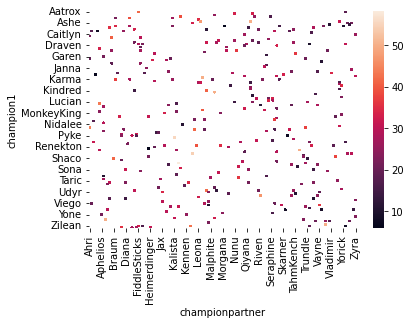

In [46]:
sns.heatmap(df)

#Item pick win rates#

In [47]:
##Items num pf picks
each_item_pick=participant.map(lambda x: [(x['item0'],1), (x['item1'],1), (x['item2'],1), (x['item3'],1), (x['item4'],1), (x['item5'],1),(x['item6'],1)])
each_item_pick=each_item_pick.flatMap(lambda x:x).reduceByKey(add).filter(lambda x:x[0]>0)

##Items num of wins
each_item_win=Win_patricipants.map(lambda x: [(x['item0'],1), (x['item1'],1), (x['item2'],1), (x['item3'],1), (x['item4'],1), (x['item5'],1),(x['item6'],1)])
each_item_win=each_item_win.flatMap(lambda x:x).reduceByKey(add).filter(lambda x:x[0]>0)

In [48]:
each_item_win.collect()

[(1056, 1378),
 (3072, 1152),
 (6656, 906),
 (3152, 1401),
 (6672, 3566),
 (3504, 484),
 (3040, 1305),
 (3024, 280),
 (3184, 244),
 (7008, 28),
 (7024, 8),
 (6657, 426),
 (3153, 3446),
 (2065, 1076),
 (6673, 2433),
 (3089, 3520),
 (3041, 1066),
 (3105, 301),
 (4401, 1322),
 (2033, 503),
 (6609, 292),
 (3057, 245),
 (3009, 1461),
 (8001, 152),
 (3857, 537),
 (7009, 6),
 (1057, 547),
 (3121, 568),
 (7025, 51),
 (1058, 2597),
 (3042, 1671),
 (3026, 625),
 (3074, 2709),
 (4642, 182),
 (3330, 177),
 (1042, 619),
 (1026, 1245),
 (7026, 83),
 (7010, 10),
 (3858, 34),
 (3363, 5434),
 (3011, 1129),
 (4643, 184),
 (3123, 392),
 (3107, 435),
 (6675, 408),
 (3091, 1018),
 (3155, 400),
 (1011, 1285),
 (3139, 105),
 (3859, 168),
 (6691, 1273),
 (2051, 487),
 (3075, 2081),
 (2003, 678),
 (6035, 49),
 (7027, 9),
 (1043, 329),
 (1027, 58),
 (7011, 23),
 (2419, 24),
 (2403, 18),
 (6692, 2054),
 (3364, 11759),
 (3108, 841),
 (3748, 952),
 (1028, 1843),
 (3860, 1061),
 (3156, 1048),
 (6676, 3104),
 (2420,

In [49]:
## Total num of picks
total_num_picks=each_item_pick.map(lambda x:("count",x[1]))
total_num_picks=total_num_picks.reduceByKey(add).collect()[0][1]

In [50]:
## Item pick rate 
each_item_pick_rate=each_item_pick.map(lambda x:(x[0],(x[1]/total_num_picks*100)))

## Item win rate numberof wins/number of picks
item_win_pick=each_item_win.fullOuterJoin(each_item_pick).filter(lambda x:x[1][0]!=None)
item_win_rate= item_win_pick.map(lambda x: (x[0],(x[1][0]/x[1][1]*100)))


In [51]:
item_win_rate.collect()

[(1056, 46.807065217391305),
 (3072, 56.30498533724341),
 (6656, 46.67697063369397),
 (3152, 50.92693565976008),
 (6672, 51.3610831052859),
 (3504, 57.008244994110726),
 (3040, 52.47285886610374),
 (3024, 51.85185185185185),
 (3184, 55.45454545454545),
 (7008, 51.85185185185185),
 (7024, 80.0),
 (6657, 50.0),
 (3153, 51.99155099577549),
 (2065, 53.346554288547345),
 (6673, 52.65094135468513),
 (3089, 55.12057626057),
 (3041, 80.2710843373494),
 (3105, 44.92537313432835),
 (4401, 55.060391503540195),
 (2033, 45.9780621572212),
 (6609, 54.27509293680297),
 (3057, 37.98449612403101),
 (3009, 51.99288256227758),
 (8001, 50.498338870431894),
 (3857, 49.584487534626035),
 (7009, 75.0),
 (1057, 48.4070796460177),
 (3121, 54.8792270531401),
 (7025, 53.125),
 (1058, 51.81564245810056),
 (3042, 50.790273556231),
 (3026, 61.75889328063241),
 (3074, 52.82761310452418),
 (4642, 41.17647058823529),
 (3330, 49.44134078212291),
 (1042, 43.1058495821727),
 (1026, 47.338403041825096),
 (7026, 55.7046979

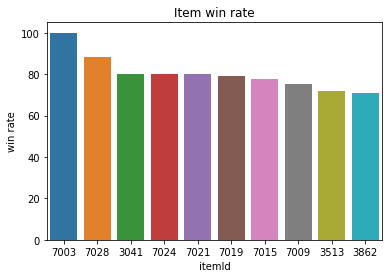

In [52]:
##item win rate 
df=pd.DataFrame(item_win_rate.sortBy(lambda x : x[1],ascending = False).collect()[0:10])
df.rename(columns = {1:'win rate',0:"itemId"}, inplace = True)
sns.barplot(x ='itemId', y ='win rate', data = df,order = df['itemId'])
# Show the plot
plt.title("Item win rate")
plt.show()

In [53]:
##item pick rate 
each_item_pick_rate.collect()


[(6672, 1.4052181093613068),
 (1056, 0.5958464804781344),
 (3072, 0.41409711245185565),
 (6656, 0.3928457943641504),
 (3152, 0.5567845338978763),
 (3040, 0.5033526484202175),
 (3504, 0.17183208625201635),
 (7008, 0.01092924930224839),
 (3184, 0.08905314246276466),
 (3024, 0.1092924930224839),
 (7024, 0.0020239350559719243),
 (1040, 0.0002023935055971924),
 (3153, 1.3414641550981912),
 (6657, 0.17243926676880791),
 (2065, 0.4082277007895371),
 (6673, 0.9352603893646261),
 (3009, 0.5687257507281106),
 (3089, 1.2924849267436707),
 (3041, 0.2687785754330715),
 (3105, 0.1356036487501189),
 (4401, 0.4859468069388589),
 (3057, 0.13054381111018912),
 (2033, 0.2214184951233285),
 (8001, 0.06092044518475491),
 (1057, 0.22870466132482742),
 (6609, 0.10888770601128951),
 (3857, 0.21919216656175936),
 (3121, 0.20947727829309415),
 (7009, 0.0016191480447775393),
 (7025, 0.01942977653733047),
 (3074, 1.0378738967024026),
 (4642, 0.08945792947395904),
 (1042, 0.2906370740375683),
 (1058, 1.01439625005

In [54]:
each_item_pick.sortBy(lambda x : x[1],ascending = False).collect()[0:10]

[(3340, 27808),
 (3364, 22869),
 (3020, 17681),
 (3006, 14600),
 (2052, 13218),
 (3047, 12901),
 (3158, 12143),
 (3111, 10779),
 (3363, 10405),
 (3157, 7748)]

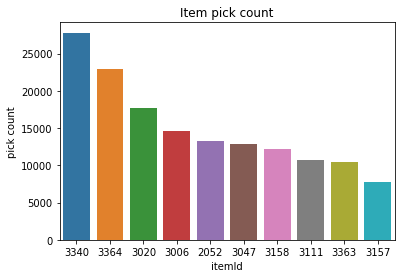

In [55]:
##item pick count
df=pd.DataFrame(each_item_pick.sortBy(lambda x : x[1],ascending = False).collect()[0:10])
df.rename(columns = {1:'pick count',0:"itemId"}, inplace = True)
sns.barplot(x ='itemId', y ='pick count', data = df,order = df['itemId'] )
# Show the plot
plt.title("Item pick count")
plt.show()

#Item champion,class synergies#

*Item champion synergies*

In [56]:
##Winning  champion ,item
item_champion=Win_patricipants.map(lambda x: [(x["championName"],x['item0']), (x["championName"],x['item1']), (x["championName"],x['item2']), (x["championName"],x['item3']), (x["championName"],x['item4']), (x["championName"],x['item5']),(x["championName"],x['item6'])])
item_champion=item_champion.flatMap(lambda x :x).filter(lambda x:x[1]>0).map(lambda x:(x,1))
###All champion ,item (win and lose)
all_item_champion=participant.map(lambda x: [(x["championName"],x['item0']), (x["championName"],x['item1']), (x["championName"],x['item2']), (x["championName"],x['item3']), (x["championName"],x['item4']), (x["championName"],x['item5']),(x["championName"],x['item6'])])
all_item_champion=all_item_champion.flatMap(lambda x :x).filter(lambda x:x[1]>0).map(lambda x:(x,1))

In [57]:
## count 
item_champion_count=item_champion.reduceByKey(add)
all_item_champion_count=all_item_champion.reduceByKey(add)

In [58]:
## Higest 10 item champion synergies
## 1-perform outer join to get ((champ,item),(champ_item_win,all_champ_item))
item_champion_synergy=item_champion_count.fullOuterJoin(all_item_champion_count).filter(lambda x:x[1][0]!=None) 
item_champion_synergy_rate=item_champion_synergy.map(lambda x:(x[0],(x[1][0]/x[1][1]*100)))
item_champion_synergy_rate.collect()


[(('Garen', 6631), 52.67857142857143),
 (('Jax', 3047), 45.493562231759654),
 (('Zoe', 1082), 48.484848484848484),
 (('Zeri', 3363), 56.213017751479285),
 (('Kled', 3133), 60.0),
 (('Jax', 3111), 51.470588235294116),
 (('Kaisa', 3074), 64.70588235294117),
 (('DrMundo', 4401), 50.76923076923077),
 (('Akali', 1082), 48.64864864864865),
 (('Nami', 1058), 72.72727272727273),
 (('Gangplank', 2055), 20.0),
 (('Elise', 3364), 57.38636363636363),
 (('Irelia', 3047), 51.724137931034484),
 (('Karma', 3364), 51.77514792899408),
 (('KSante', 3193), 61.904761904761905),
 (('KSante', 6665), 52.17391304347826),
 (('Zeri', 3139), 80.0),
 (('Yuumi', 3853), 47.930283224400874),
 (('Camille', 6333), 55.55555555555556),
 (('Zac', 3158), 60.509554140127385),
 (('Galio', 3113), 50.0),
 (('Karma', 1028), 51.515151515151516),
 (('Yone', 3364), 55.55555555555556),
 (('Viktor', 3363), 55.61797752808989),
 (('Jhin', 3009), 53.720693170234455),
 (('Gwen', 3089), 59.61538461538461),
 (('Gwen', 3041), 100.0),
 (('K

In [59]:
##champ item synergies rates
champ_Synergy_rate=item_champion_synergy_rate.map(lambda x:(str(x[0][0]),x[0][1],x[1]))
df=pd.DataFrame(champ_Synergy_rate.collect()[0:50])
df.rename(columns = {0:'champion',1:"item",2:"synergy"}, inplace = True)
df = df.pivot('champion', 'item', 'synergy')

In [60]:
df

item,1028,1033,1036,1058,1082,2031,2055,2420,3009,3020,...,3853,4401,6333,6617,6630,6631,6653,6657,6665,6672
champion,,,,,,,,,,,,,,,,,,,,,
Akali,NaN,NaN,NaN,NaN,48.648649,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bard,52.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.908592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Camille,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,55.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DrMundo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.769231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FiddleSticks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.8,NaN,NaN,NaN
Galio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gangplank,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


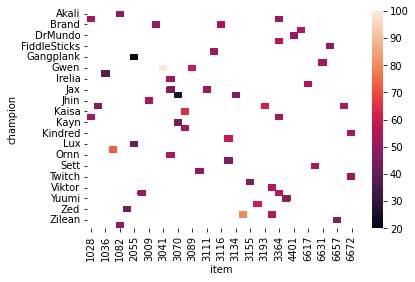

In [61]:
sns.heatmap(df)

*item class synergies*

In [62]:
item_class_synergy_rate=item_champion_synergy_rate.map(lambda x : (x[0][0],(x[0][1],x[1])))
## Map champ name to its corresponding class
item_class_synergy_rate= map_champ(item_class_synergy_rate,False)
#Map to proper format ((class,item),rate)
item_class_synergy_rate=item_class_synergy_rate.map(lambda x :((x[0],x[1][0]),x[1][1]))


In [63]:
item_class_synergy_rate.collect()

[((['Mage', 'Support'], 1082), 48.484848484848484),
 ((['Mage', 'Support'], 3802), 16.666666666666664),
 ((['Mage', 'Support'], 3853), 44.0),
 ((['Mage', 'Support'], 6653), 66.66666666666666),
 ((['Mage', 'Support'], 3165), 20.0),
 ((['Mage', 'Support'], 3117), 50.0),
 ((['Mage', 'Support'], 6333), 100.0),
 ((['Mage', 'Support'], 1037), 100.0),
 ((['Mage', 'Support'], 3020), 40.32258064516129),
 ((['Mage', 'Support'], 3340), 40.909090909090914),
 ((['Mage', 'Support'], 3100), 45.45454545454545),
 ((['Mage', 'Support'], 1052), 43.333333333333336),
 ((['Mage', 'Support'], 3116), 100.0),
 ((['Mage', 'Support'], 2055), 60.0),
 ((['Mage', 'Support'], 3191), 36.0),
 ((['Mage', 'Support'], 3047), 50.0),
 ((['Mage', 'Support'], 3102), 30.0),
 ((['Mage', 'Support'], 3070), 25.0),
 ((['Mage', 'Support'], 3041), 71.42857142857143),
 ((['Mage', 'Support'], 3089), 40.74074074074074),
 ((['Mage', 'Support'], 2033), 44.0),
 ((['Mage', 'Support'], 3057), 25.0),
 ((['Mage', 'Support'], 6609), 100.0),
 

In [64]:
##class item synergies rates
item_class_synergy_rate=item_class_synergy_rate.map(lambda x:(x[0][1],str(x[0][0]),x[1]))
df=pd.DataFrame(item_class_synergy_rate.collect()[0:500])
df.rename(columns = {1:'class',0:"item",2:"synergy"}, inplace = True)
df = df.pivot('item', 'class', 'synergy')

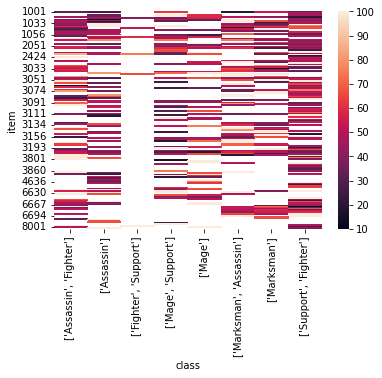

In [65]:
sns.heatmap(df)

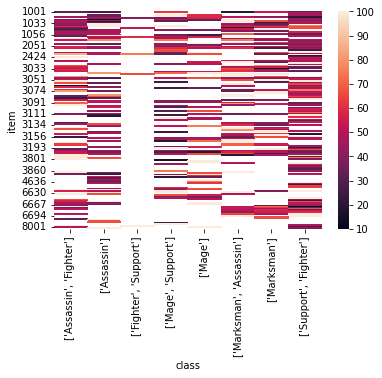

In [66]:
sns.heatmap(df)


*Item suggestion*

-> Based on the champ ,suggestion will be provided for best items with that champ

In [67]:
def Item_suggestions(ChampName):
  suggest=item_champion_count.filter(lambda x:(x[0][0]==ChampName)).sortBy(lambda x : x[1],ascending = False).collect()
  print("here is our suggestion for the best item with your champ : format ((champname,itemid),countwin)")
  return suggest

In [68]:
Item_suggestions('Aatrox')[0:10]

here is our suggestion for the best item with your champ : format ((champname,itemid),countwin)


[(('Aatrox', 3340), 218),
 (('Aatrox', 3047), 184),
 (('Aatrox', 6692), 181),
 (('Aatrox', 6333), 162),
 (('Aatrox', 3074), 120),
 (('Aatrox', 3111), 107),
 (('Aatrox', 3071), 104),
 (('Aatrox', 6694), 86),
 (('Aatrox', 6665), 77),
 (('Aatrox', 1036), 74)]

In [69]:
Item_suggestions('Azir')[0:10]

here is our suggestion for the best item with your champ : format ((champname,itemid),countwin)


[(('Azir', 3020), 99),
 (('Azir', 6655), 72),
 (('Azir', 4645), 65),
 (('Azir', 3340), 51),
 (('Azir', 3157), 42),
 (('Azir', 1058), 38),
 (('Azir', 3115), 34),
 (('Azir', 3089), 34),
 (('Azir', 6653), 30),
 (('Azir', 3363), 29)]

#More requirements#


*  Champion lane synergy



In [70]:
##Winning  champion ,lane
lane_champion=Win_patricipants.map(lambda x: (x["championName"],x['lane'])).filter(lambda x:x[1]!='NONE')
lane_champion=lane_champion.map(lambda x:(x,1))
###All champion ,lane (win and lose)
all_lane_champion=participant.map(lambda x: (x["championName"],x['lane'])).filter(lambda x:x[1]!='NONE')
all_lane_champion=all_lane_champion.map(lambda x:(x,1))

In [71]:
## count 
lane_champion_count=lane_champion.reduceByKey(add)
all_lane_champion_count=all_lane_champion.reduceByKey(add)

In [72]:
## 1-perform outer join to get ((champ,lane),(lane_champion_count,all_lane_champion_count))
## 2- calculate rate by lane_champion_count of win/all_lane_champion_count
lane_champion_synergy=lane_champion_count.fullOuterJoin(all_lane_champion_count).filter(lambda x:x[1][0]!=None).filter(lambda x:x[1][1]!=None) 
lane_champion_synergy_rate=lane_champion_synergy.map(lambda x:(x[0],(x[1][0]/x[1][1]*100)))
lane_champion_synergy_rate.collect()

[(('Zeri', 'BOTTOM'), 52.45283018867924),
 (('Skarner', 'JUNGLE'), 49.01960784313725),
 (('Talon', 'MIDDLE'), 54.761904761904766),
 (('Zed', 'JUNGLE'), 35.86206896551724),
 (('Yone', 'TOP'), 53.275109170305676),
 (('Neeko', 'MIDDLE'), 49.494949494949495),
 (('Lux', 'MIDDLE'), 47.85276073619632),
 (('Ornn', 'MIDDLE'), 63.33333333333333),
 (('Anivia', 'TOP'), 25.0),
 (('TahmKench', 'MIDDLE'), 45.0),
 (('Sion', 'MIDDLE'), 39.58333333333333),
 (('KogMaw', 'JUNGLE'), 60.0),
 (('Taliyah', 'BOTTOM'), 57.89473684210527),
 (('Fizz', 'BOTTOM'), 55.55555555555556),
 (('Seraphine', 'BOTTOM'), 56.2962962962963),
 (('Taric', 'TOP'), 25.0),
 (('Malphite', 'MIDDLE'), 60.0),
 (('Sivir', 'BOTTOM'), 54.121863799283155),
 (('Viktor', 'BOTTOM'), 77.77777777777779),
 (('Garen', 'MIDDLE'), 40.0),
 (('Irelia', 'MIDDLE'), 43.71584699453552),
 (('Karma', 'TOP'), 46.2962962962963),
 (('Jax', 'MIDDLE'), 47.61904761904761),
 (('Vayne', 'MIDDLE'), 54.0),
 (('Gangplank', 'MIDDLE'), 49.193548387096776),
 (('Nidalee',

In [73]:
##champ item synergies rates
champ_Synergy_rate=lane_champion_synergy_rate.map(lambda x:(x[0][0],x[0][1],x[1]))
df=pd.DataFrame(champ_Synergy_rate.collect()[0:50])
df.rename(columns = {0:'champion',1:"lane",2:"synergy"}, inplace = True)
df = df.pivot('champion', 'lane', 'synergy')

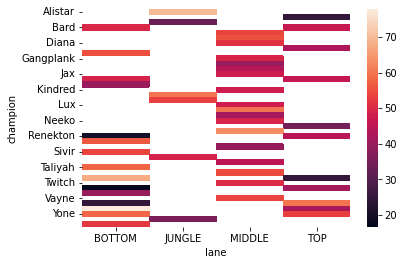

In [74]:
sns.heatmap(df)

*Maps count used,to know which map perfered by players*

In [75]:
Maps=rddfile.map(lambda x: x["info"]).map(lambda x: (x["mapId"],1))

In [76]:
map_count=Maps.reduceByKey(add)

In [77]:
map_count.collect()

[(0, 1), (11, 6168), (12, 1666)]

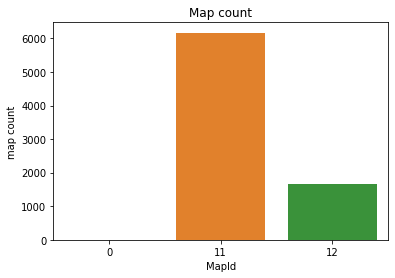

In [78]:
##item pick count
df=pd.DataFrame(map_count.sortBy(lambda x : x[1],ascending = False).collect()[0:10])
df.rename(columns = {1:'map count',0:"MapId"}, inplace = True)
sns.barplot(x ='MapId', y ='map count', data = df)
# Show the plot
plt.title("Map count")
plt.show()